<a href="https://colab.research.google.com/github/bilalProgTech/mtech-nmims/blob/master/Rajas_Divekar_(D005).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importing Files on Google Colab


In [25]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


Importing Train and Test Data

In [27]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")


In [29]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [30]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


Analysis of Null Values (if Any)

In [31]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [32]:
test.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


In [33]:
test.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

Checking IsUnderRisk Variable Distribution

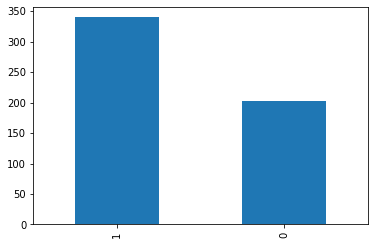

In [34]:
train.IsUnderRisk.value_counts().plot(kind='bar')

Development of Model

In [35]:
X = train.iloc[:, train.columns != 'IsUnderRisk']
y = train.iloc[:, train.columns == 'IsUnderRisk']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Logistic Regression

In [38]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Prediction 

In [39]:
reg.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [40]:
reg.score(X_test, y_test)

0.8348623853211009

In [41]:
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(7,)),
                             tf.keras.layers.Dense(3, ),
                             tf.keras.layers.Dropout(0.05),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.006), loss = 'binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 24        
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train, y_train, epochs=80)

Epoch 1/80
14/14 [==============================] - 0s 4ms/step - loss: 0.4287
Epoch 2/80
14/14 [==============================] - 0s 4ms/step - loss: 0.4505
Epoch 3/80
14/14 [==============================] - 0s 3ms/step - loss: 0.4354
Epoch 4/80
14/14 [==============================] - 0s 3ms/step - loss: 0.4416
Epoch 5/80
14/14 [==============================] - 0s 3ms/step - loss: 0.4251
Epoch 6/80
14/14 [==============================] - 0s 4ms/step - loss: 0.4523
Epoch 7/80
14/14 [==============================] - 0s 4ms/step - loss: 0.4306
Epoch 8/80
14/14 [==============================] - 0s 3ms/step - loss: 0.4278
Epoch 9/80
14/14 [==============================] - 0s 4ms/step - loss: 0.4338
Epoch 10/80
14/14 [==============================] - 0s 5ms/step - loss: 0.4359
Epoch 11/80
14/14 [==============================] - 0s 3ms/step - loss: 0.4229
Epoch 12/80
14/14 [==============================] - 0s 3ms/step - loss: 0.4310
Epoch 13/80
14/14 [==============================

Evaluation

In [44]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.4532


0.4532080888748169

In [45]:
model.predict(X_test)

array([[0.9251342 ],
       [0.7478459 ],
       [0.5529467 ],
       [0.80430096],
       [0.44294664],
       [0.9802947 ],
       [0.9748486 ],
       [0.9121869 ],
       [0.3043769 ],
       [0.85885406],
       [0.98610175],
       [0.99317896],
       [0.9845645 ],
       [0.4355866 ],
       [0.1574794 ],
       [0.63148665],
       [0.9966185 ],
       [0.10617921],
       [0.04973945],
       [0.7267621 ],
       [0.70768976],
       [0.5849375 ],
       [0.929615  ],
       [0.93247545],
       [0.16446087],
       [0.9838667 ],
       [0.1369226 ],
       [0.7627861 ],
       [0.45014012],
       [0.9918052 ],
       [0.98862326],
       [0.46531555],
       [0.91100097],
       [0.1716904 ],
       [0.21398538],
       [0.99650514],
       [0.8369608 ],
       [0.15714908],
       [0.9825408 ],
       [0.85832876],
       [0.64081573],
       [0.73160475],
       [0.10293856],
       [0.14805126],
       [0.89985347],
       [0.9938787 ],
       [0.85571927],
       [0.833

AUC - ROC Score

In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, reg.predict_proba(X_test)[:,1])

0.8916786226685796

Importing One Hot Encoder

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
Y = np.array(y)
y_ = Y.reshape(-1,1)
y_

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [51]:
encoder = OneHotEncoder(sparse = False)
y_new = encoder.fit_transform(y_)
y_new

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2)

In [54]:
model2 = tf.keras.Sequential([
                              tf.keras.layers.InputLayer(input_shape=(7, )),
                              tf.keras.layers.Dense(3, ),
                              tf.keras.layers.Dense(2, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.006), loss = 'categorical_crossentropy')
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 24        
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [55]:
model2.fit(X_test, y_test, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 1.3394
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.5086
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1585
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8722
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0873
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7526
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 1.6957
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0456
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8792
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0142
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8267
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9185
Epoch 13/100
4/4 [==============================] - 0s 10ms/s

In [56]:
model2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.5273


0.5273059010505676

In [57]:
model2_predict = model2.predict(X_test)

In [61]:
from sklearn.metrics import log_loss
log_loss(y_test, model2_predict)

0.5273059026397969